In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



READ THE DATA

In [2]:
df=pd.read_csv("movies.csv")

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


CLEANING THE DATA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [5]:
#PERCENTAGE OF NULL VALUES IN A COLUMN
for col in df.columns:
  count=np.mean(df[col].isnull())*100
  print('{}-{:.2f}%'.format(col,count))

name-0.00%
rating-1.00%
genre-0.00%
year-0.00%
released-0.03%
score-0.04%
votes-0.04%
director-0.00%
writer-0.04%
star-0.01%
country-0.04%
budget-28.31%
gross-2.46%
company-0.22%
runtime-0.05%


In [6]:
#GETTING RID OF THE NULL VALUES
df.dropna(inplace = True)

In [7]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [8]:
#DATATYPE OF BUDGET AND VOTES WAS FLOAT,CHANING IT TO INTEGER
df['budget']=df['budget'].astype('int64')
df['votes']=df['votes'].astype('int64')
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross       float64
company      object
runtime     float64
dtype: object

In [9]:
df.released.head()

0    June 13, 1980 (United States)
1     July 2, 1980 (United States)
2    June 20, 1980 (United States)
3     July 2, 1980 (United States)
4    July 25, 1980 (United States)
Name: released, dtype: object

In [10]:
#SPLITTING RELEASED INTO RELEASED YEAR AND RELEASED MONTH
df['released _Year']=df['released'].apply(lambda x:x.split(',')[-1][1:5])
df['released_Month']=df['released'].apply(lambda x:x.split(' ')[0])

In [11]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released _Year,released_Month
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,146.0,1980,June
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,104.0,1980,July
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,124.0,1980,June
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,88.0,1980,July
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,98.0,1980,July


In [12]:
df.sort_values(by=['gross'],ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released _Year,released_Month
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2.847246e+09,Twentieth Century Fox,162.0,2009,December
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2.797501e+09,Marvel Studios,181.0,2019,April
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2.201647e+09,Twentieth Century Fox,194.0,1997,December
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2.069522e+09,Lucasfilm,138.0,2015,December
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2.048360e+09,Marvel Studios,149.0,2018,April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5.073000e+03,Two Prong Lesson,96.0,2015,January
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2.970000e+03,Trimark Pictures,97.0,1994,June
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2.554000e+03,Copperheart Entertainment,108.0,2001,May
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2.270000e+03,Embassy Pictures,85.0,1982,March


In [13]:
#GETTING ACTORS WITH ATLEASET 5 MOVIES
top_star_count = df.groupby(['star'])['name'].count().to_frame().sort_values('name',ascending=False)
top_star_count = top_star_count[top_star_count['name'] >= 5]
top_star_count.rename(columns={'name': 'count'},inplace=True)

In [14]:
top_star_count.head()

,count
star,
Nicolas Cage,40
Tom Hanks,38
Robert De Niro,38
Bruce Willis,34
Tom Cruise,33


In [15]:
#GETTING ACTORS WITH ATLEASET 5 MOVIES
top_director_count = df.groupby(['director'])['name'].count().to_frame().sort_values('name',ascending=False)
top_director_count = top_director_count[top_director_count['name'] >= 5]
top_director_count.rename(columns={'name':'count'},inplace=True)

In [16]:
top_director_count.head()

,count
director,
Woody Allen,33
Clint Eastwood,31
Steven Spielberg,27
Ron Howard,23
Ridley Scott,23


In [17]:
top_star_gross = df.groupby(['star'])['gross'].sum().to_frame().reset_index()
top_director_gross = df.groupby(['director'])['gross'].sum().to_frame().reset_index()

In [18]:
#ADDING GROSS INCOME OF THE ACTOR AND DIRECTOR
top_star=pd.merge(top_star_count,top_star_gross,on='star')
top_director=pd.merge(top_director_count,top_director_gross,on='director')

In [19]:
top_star.head()

,star,count,gross
0,Nicolas Cage,40,4.159283e+09
1,Tom Hanks,38,9.899945e+09
2,Robert De Niro,38,2.308585e+09
3,Bruce Willis,34,5.318951e+09
4,Tom Cruise,33,9.440310e+09


In [20]:
top_director.head()

,director,count,gross
0,Woody Allen,33,9.439916e+08
1,Clint Eastwood,31,3.275522e+09
2,Steven Spielberg,27,9.629049e+09
3,Ron Howard,23,4.388093e+09
4,Ridley Scott,23,4.006716e+09


In [21]:
#GETTING AVERAGE INCOME
top_star['average_earning'] = top_star['gross']/top_star['count']
top_director['average_earning'] = top_director['gross']/top_director['count']

In [22]:
top_star = top_star.sort_values(by='average_earning', ascending=False).head(10)
top_director = top_director.sort_values(by='average_earning', ascending=False).head(10)

In [23]:
top_star_score = df.groupby(['star'])['score'].mean().to_frame()
top_director_score = df.groupby(['director'])['score'].mean().to_frame()

In [24]:
top_star_score.head()

,score
star,
'Weird Al' Yankovic,7.0
50 Cent,5.4
A.J. Cook,6.2
Aaliyah,5.3
Aamir Khan,7.2


In [25]:
top_star_score=pd.merge(top_star_count,top_star_score,on='star')
top_director_score=pd.merge(top_director_count,top_director_score,on='director')
top_star_score.head()

,count,score
star,,
Nicolas Cage,40,6.207500
Tom Hanks,38,7.092105
Robert De Niro,38,6.721053
Bruce Willis,34,6.514706
Tom Cruise,33,6.833333


In [26]:
#SORTING START AND DIRECTOR ON THE BASIS ON THE AVERAGE INCOME
top_star_score = top_star_score.sort_values(by='score', ascending=False).head(10).reset_index()
top_director_score = top_director_score.sort_values(by='score', ascending=False).head(10).reset_index()

In [27]:
top_star

,star,count,gross,average_earning
226,Chris Pratt,6,5.278456e+09,8.797427e+08
287,Sam Worthington,5,3.787009e+09,7.574019e+08
106,Daniel Radcliffe,10,6.971268e+09,6.971268e+08
40,Robert Downey Jr.,19,1.185594e+10,6.239967e+08
258,Ray Romano,5,2.839871e+09,5.679742e+08
236,Chris Evans,5,2.368157e+09,4.736314e+08
134,Daniel Craig,9,4.005561e+09,4.450623e+08
186,Kristen Bell,7,2.945869e+09,4.208384e+08
129,Kristen Stewart,9,3.780967e+09,4.201075e+08
55,Vin Diesel,15,6.036313e+09,4.024208e+08


AVERAGE INCOME MADE BY MOVIES OF ACTOR WHO ACTED IN MORE THAN 5 FILMS

Text(0.5, 0, 'Average Earning per movie')

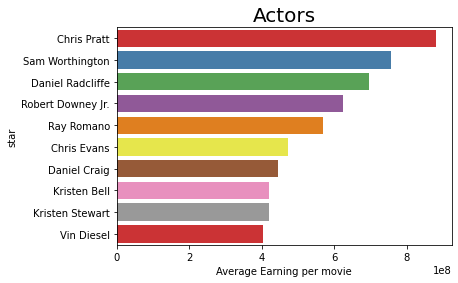

In [28]:
ax_1 = sns.barplot(y='star', x ='average_earning', data=top_star[:10], palette='Set1')
ax_1.set_title('Actors', fontsize=20)
ax_1.set_xlabel('Average Earning per movie')

AVERAGE INCOME MADE BY MOVIES OF DIRECTOR WHO DIRECTED MORE THAN 5 FILMS

Text(0.5, 0, 'Average Earning per movie')

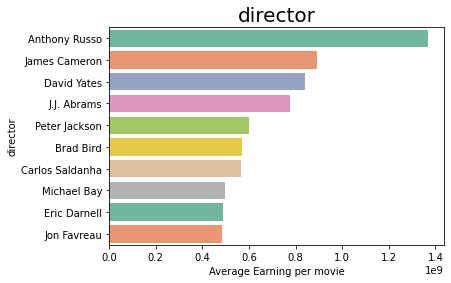

In [29]:
ax_1 = sns.barplot(y='director', x ='average_earning', data=top_director[:10], palette='Set2')
ax_1.set_title('director', fontsize=20)
ax_1.set_xlabel('Average Earning per movie')

AVERAGE RATING OF TOP ACTORS

Text(0.5, 0, 'RATING')

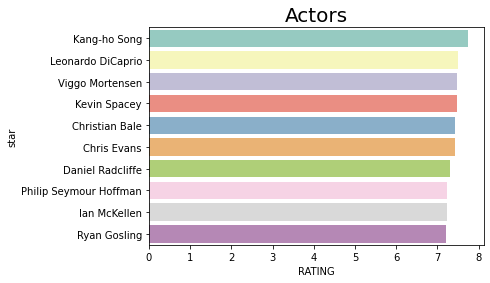

In [30]:
ax_1 = sns.barplot(y='star', x ='score', data=top_star_score, palette='Set3')
ax_1.set_title('Actors', fontsize=20)
ax_1.set_xlabel('RATING')

AVERAGE RATING OF TOP DIRECTORS

Text(0.5, 0, 'RATING')

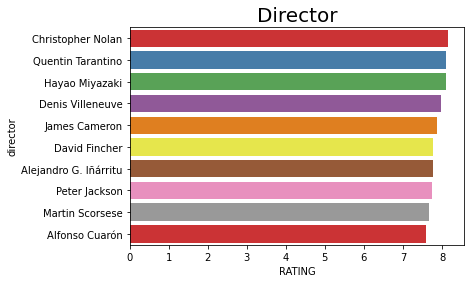

In [31]:
ax_1 = sns.barplot(y='director', x ='score', data=top_director_score, palette='Set1')
ax_1.set_title('Director', fontsize=20)
ax_1.set_xlabel('RATING')

In [32]:
df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


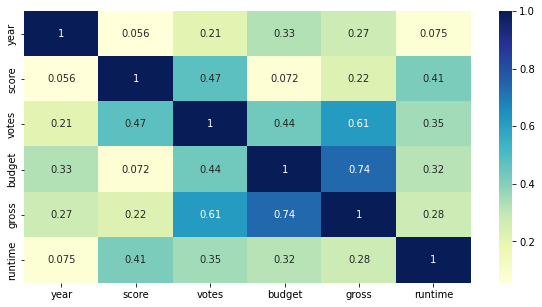

In [33]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)

WE CAN OBSERVE THAT GROSS AND BUDGET ARE HIGHLY CORRELATED